# Figure 5: cloud-radiative impact in ICON2.1 and ICON2.6 using the Keshtgar et al. (2022) method for all cloud-radiative heating and separated for free-tropospheric cloud-radiative heating and boundary-layer cloud-radiative heating

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys; sys.path.append("../helperfuncs")
from myfunctions import dict_expid, load_data_cyclonemetrics, domainmean, eke, corepressure

Load CRH only and radiation-off simulations.

In [2]:
explist=list()
for expid in dict_expid.keys():
    if "NORAD" in dict_expid[expid] or "CRHONLY" in dict_expid[expid]: # select simulations with no radiation or cloud-radiative heating only
        explist.append(load_data_cyclonemetrics(expid=expid, chunks="auto"))

Compute metrics of CRH impact and print to screen.

In [3]:
def restrictlat(data):
    return data.sel(lat=slice(75,25))

In [4]:
def make_metrics(ds, ds_norad):
    eke300 = ( (domainmean(restrictlat(eke(ds).sel(lev=300e2)))).isel(time=slice(10,32)).values.max() - 
               (domainmean(restrictlat(eke(ds_norad).sel(lev=300e2)))).isel(time=slice(10,32)).values.max() )
    eke925 = ( (domainmean(restrictlat(eke(ds).sel(lev=925e2)))).isel(time=slice(10,32)).values.max() - 
               (domainmean(restrictlat(eke(ds_norad).sel(lev=925e2)))).isel(time=slice(10,32)).values.max() )    
    pcore  = ( corepressure(restrictlat(ds), meancyclone=True).isel(time=slice(10,32)).values.min() - 
               corepressure(restrictlat(ds_norad), meancyclone=True).isel(time=slice(10,32)).values.min() )
    print(ds.attrs["setup"], "[", np.around(eke300, decimals=2), ", ", np.around(eke925, decimals=2), ", ", np.around(pcore, decimals=2), "]")
    
for version in ["ICON2.1", "ICON2.6"]:
    for setup in ["CRHONLY", "PBLCRHONLY", "FTCRHONLY"]:
        ds = [ds for ds in explist if ds.attrs["setup"]==version+" "+setup][0]
        ds_norad = [ds for ds in explist if ds.attrs["setup"]==version+" NORAD"][0]
        make_metrics(ds, ds_norad)

ICON2.1 CRHONLY [ -20.55 ,  -2.62 ,  523.48 ]
ICON2.1 PBLCRHONLY [ -24.59 ,  -3.3 ,  449.38 ]
ICON2.1 FTCRHONLY [ 17.64 ,  0.75 ,  276.69 ]
ICON2.6 CRHONLY [ 21.26 ,  -0.02 ,  10.55 ]
ICON2.6 PBLCRHONLY [ -7.89 ,  -1.37 ,  352.34 ]
ICON2.6 FTCRHONLY [ 31.38 ,  0.8 ,  -129.1 ]


Store metrics of CRH impact in floats for plotting.

* 1st entry: EKE at 300 hPa
* 2nd entry: EKE at m925 hPa
* 3rd entry: cyclone central pressure

In [5]:
i21_all = [ -20.55 ,  -2.62 ,  523.48 ]
i21_pbl = [ -24.59 ,  -3.3 ,  449.38 ]
i21_ftr = [ 17.64 ,  0.75 ,  276.69 ]
i26_all = [ 21.26 ,  -0.02 ,  10.55 ]
i26_pbl = [ -7.89 ,  -1.37 ,  352.34 ]
i26_ftr = [ 31.38 ,  0.8 ,  -129.1 ]

In [6]:
def make_niceaxes(ax):
    # adjust spines
    ax.spines["top"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["bottom"].set_position(("data",0.8))
    ax.spines["left"].set_position(("data",0))
    plt.ylim(0.8,3.2)
    ax.spines["left"].set_bounds(0.8, 3.1)
    plt.yticks([ ])

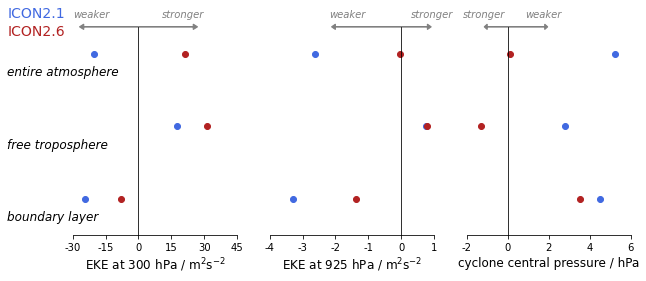

In [7]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(10,4));

ax=plt.subplot(1,3,1)
plt.plot(i21_all[0], 2.8, "o", color="royalblue", label="ICON2.1")
plt.plot(i26_all[0], 2.8, "o", color="firebrick", label="ICON2.6")
plt.plot(i21_ftr[0], 2, "o", color="royalblue")
plt.plot(i26_ftr[0], 2, "o", color="firebrick")
plt.plot(i21_pbl[0], 1.2, "o", color="royalblue")
plt.plot(i26_pbl[0], 1.2, "o", color="firebrick")
plt.xlim(-30,45)
plt.xticks([-30,-15,0,15,30,45],["-30", "-15", "0", "15", "30", "45"], size=10);
plt.xlabel(r"EKE at 300 hPa / m$^{2}$s$^{-2}$", size=12, ha="center", va="top")
plt.text(-60, 3.2, "ICON2.1", color="royalblue", size=14, ha="left")
plt.text(-60, 3.0, "ICON2.6", color="firebrick", size=14, ha="left")
plt.text(-60, 2.6, "entire atmosphere", fontstyle="italic", ha="left", va="center", fontsize=12)
plt.text(-60, 1.8, "free troposphere", fontstyle="italic", ha="left", va="center", fontsize=12)
plt.text(-60, 1.0, "boundary layer", fontstyle="italic", ha="left", va="center", fontsize=12)
make_niceaxes(ax)
plt.arrow(0, 3.1, -25, 0, head_width=0.06, head_length=2, color="gray")
plt.arrow(0, 3.1,  25, 0, head_width=0.06, head_length=2, color="gray")
plt.text(-30, 3.2, "weaker", fontsize=10, color="gray", fontstyle="italic", ha="left")
plt.text(30, 3.2, "stronger", fontsize=10, color="gray", fontstyle="italic", ha="right")

ax=plt.subplot(1,3,2)
plt.plot(i21_all[1], 2.8, "o", color="royalblue", label="ICON2.1")
plt.plot(i26_all[1], 2.8, "o", color="firebrick", label="ICON2.6")
plt.plot(i21_ftr[1], 2, "o", color="royalblue")
plt.plot(i26_ftr[1], 2, "o", color="firebrick")
plt.plot(i21_pbl[1], 1.2, "o", color="royalblue")
plt.plot(i26_pbl[1], 1.2, "o", color="firebrick")
plt.xlim(-4,1)
plt.xticks([-4,-3,-2,-1,0,1],["-4", "-3", "-2", "-1", "0", "1"], size=10);
plt.xlabel(r"EKE at 925 hPa / m$^{2}$s$^{-2}$", size=12, ha="center", va="top")
make_niceaxes(ax)
plt.arrow(0, 3.1, -2, 0, head_width=0.06, head_length=0.12, color="gray")
plt.arrow(0, 3.1,  0.8, 0, head_width=0.06, head_length=0.12, color="gray")
plt.text(-2.2, 3.2, "weaker", fontsize=10, color="gray", fontstyle="italic", ha="left")
plt.text(1.6, 3.2, "stronger", fontsize=10, color="gray", fontstyle="italic", ha="right")

ax=plt.subplot(1,3,3)
plt.plot(1e-2*i21_all[2], 2.8, "o", color="royalblue", label="ICON2.1")
plt.plot(1e-2*i26_all[2], 2.8, "o", color="firebrick", label="ICON2.6")
plt.plot(1e-2*i21_ftr[2], 2, "o", color="royalblue")
plt.plot(1e-2*i26_ftr[2], 2, "o", color="firebrick")
plt.plot(1e-2*i21_pbl[2], 1.2, "o", color="royalblue")
plt.plot(1e-2*i26_pbl[2], 1.2, "o", color="firebrick")
plt.xlim(-2,6)
plt.xticks([-2,0,2,4,6],["-2", "0", "2", "4", "6"], size=10);
plt.xlabel("cyclone central pressure / hPa", size=12, ha="center", va="top")
ax.xaxis.set_label_coords(0.5,-0.1)
make_niceaxes(ax)
plt.arrow(0, 3.1, -1, 0, head_width=0.06, head_length=0.15, color="gray")
plt.arrow(0, 3.1,  1.8, 0, head_width=0.06, head_length=0.15, color="gray")
plt.text(-2.2, 3.2, "stronger", fontsize=10, color="gray", fontstyle="italic", ha="left")
plt.text(2.6, 3.2, "weaker", fontsize=10, color="gray", fontstyle="italic", ha="right")

plt.savefig("figure_5.pdf")
plt.show()